# Calculation of the Probability distribution function

Micromagnet Geometry

![mm](./micromagnet.jpg)

The donors were assumed to be at 50nm below the micromagnet. The magnetic field is calculated in a 200nm x 200nm region between the two micromagnets.

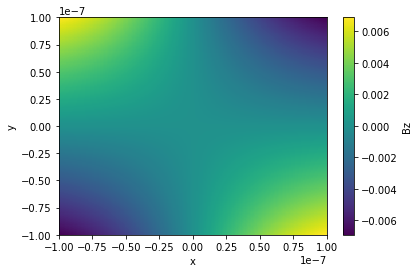

In [157]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bxData = np.loadtxt("./Mathematica_scripts/bxData.dat").T
byData = np.loadtxt("./Mathematica_scripts/byData.dat").T
bzData = np.loadtxt("./Mathematica_scripts/bzData.dat").T

x = np.linspace(-100e-9,100e-9,bxData.shape[0])
y = np.linspace(-100e-9,100e-9,bxData.shape[0])
XX,YY = np.meshgrid(x,y)

plt.pcolor(XX,YY,byData)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Bz")

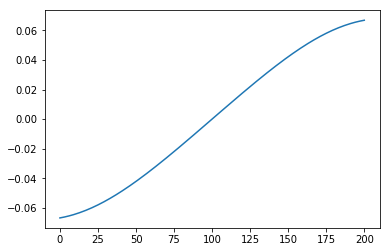

In [142]:
plt.plot(bzData[100,:])

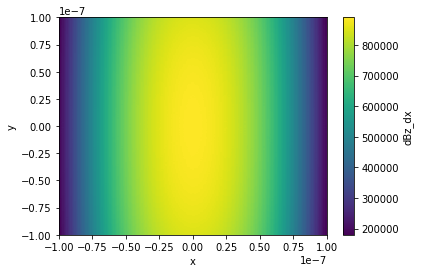

In [83]:
bz_gradient = np.gradient(bzData,1e-9)
plt.pcolor(XX,YY,bz_gradient[1])
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="dBz_dx")

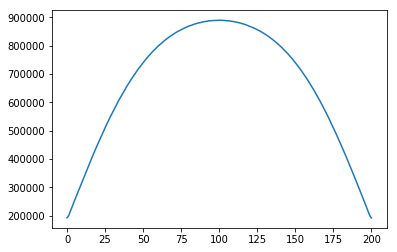

In [143]:
plt.plot(bz_gradient[1][100,:])

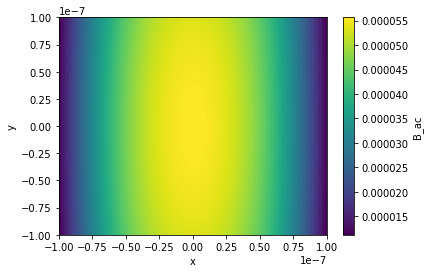

In [144]:
l_orb = 2.5e-9 
Delta = 10e-3 #eV
E_ac = 0.1e6 #V/m

conv_factor = l_orb**2*E_ac/Delta 
B_ac = conv_factor * bz_gradient[1]

plt.pcolor(XX,YY,B_ac)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="B_ac")



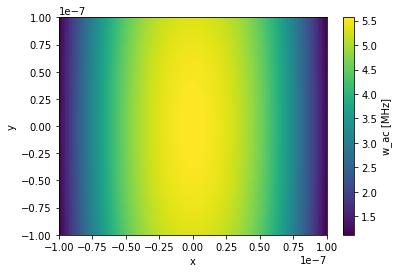

In [145]:
g_mu_b_h = 1e11
w_ac = g_mu_b_h * B_ac 

plt.pcolor(XX,YY,w_ac/1e6)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="w_ac [MHz]")

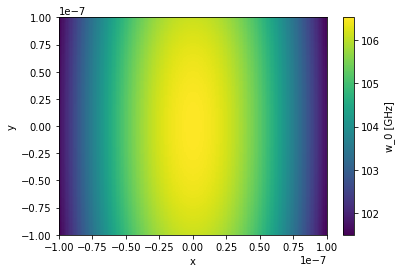

In [146]:
B_ext = 1
B_net = B_ext + bxData
w_0 = g_mu_b_h * B_net

plt.pcolor(XX,YY,w_0/1e9)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="w_0 [GHz]")

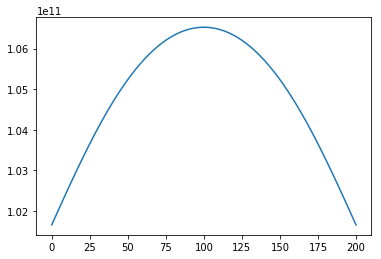

In [151]:
plt.plot(w_0[100,:])

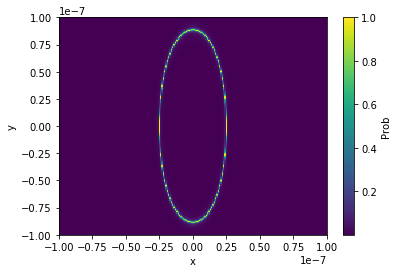

In [158]:
center = 100
x_0 = center + 25
y_0 = center  

P = w_ac*w_ac/(w_ac*w_ac + (w_0[y_0,x_0] - w_0)**2)
plt.pcolor(XX,YY,P)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Prob")


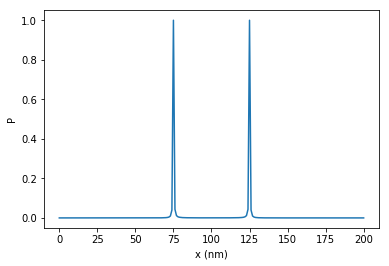

In [159]:
plt.plot(P[100,:])
plt.xlabel("x (nm)")
plt.ylabel("P")

In [149]:
P[125,100]

0.051016746909080646